<a href="https://colab.research.google.com/github/AnushaChatto/GalaxyZooChallange/blob/main/Copy_of_Galaxy10_Colored_vs_Grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galaxy10 tutorial with various scaled images

### Project Information and Plan:

The AstroNN library was recreated to process images from the GalaxyZoo dataset
Then the images were converted to greyscale and passed through the same model. Accuracy was noted and compaired

### This tutorial will be using astroNN

* Galaxy10 description on astroNN: http://astronn.readthedocs.io/en/latest/galaxy10.html

* astroNN github: https://github.com/henrysky/astroNN

* astroNN documentation: http://astronn.readthedocs.io/

![galaxy10](http://astronn.readthedocs.io/en/latest/_images/galaxy10_example.png)

### Sources
1. Galaxy10 dataset classification labels come from Galaxy Zoo
2. Galaxy10 dataset images come from Sloan Digital Sky Survey (SDSS)

### AstroNN Author and Basic Information

*  **Henry Leung** - Astronomy student, University of Toronto - henrysky
*  Contact Henry: henrysky.leung [at] utoronto.ca
* This tutorial is created on 10/Feb/2018 with Keras 2.1.3, Tensorflow 1.6.0, Nvidia CuDNN 7.0 for CUDA 9.0 (Optional), Python 3.6.3 Win10 x64


# Program

## Installing libraries

### CLoning (Not needed)

In [ ]:
!git clone --depth=1 https://github.com/henrysky/astroNN

Cloning into 'astroNN'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 195 (delta 7), reused 87 (delta 0), pack-reused 0
Receiving objects: 100% (195/195), 48.22 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [ ]:
!python astroNN/setup.py install

/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:453: UserWarning: Normalizing '1.1.dev' to '1.1.dev0'
  normalized_version,
running install
running bdist_egg
running egg_info
creating astroNN.egg-info
writing astroNN.egg-info/PKG-INFO
writing dependency_links to astroNN.egg-info/dependency_links.txt
writing requirements to astroNN.egg-info/requires.txt
writing top-level names to astroNN.egg-info/top_level.txt
writing manifest file 'astroNN.egg-info/SOURCES.txt'
reading manifest file 'astroNN.egg-info/SOURCES.txt'
writing manifest file 'astroNN.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying astroNN.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying astroNN.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying astroNN.egg-info/dependency_links.txt -> build

### Using PIP (Do this)

In [ ]:
!pip install astroNN

     |████████████████████████████████| 9.3MB 16.6MB/s 
     |████████████████████████████████| 4.5MB 28.2MB/s 
     |████████████████████████████████| 2.3MB 37.2MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-cp36-none-any.whl size=9284595 sha256=4d018044855b2dfa21021d721f64e9820034d812238976a0636433054316b20b
  Stored in directory: /root/.cache/pip/wheels/22/48/89/bcbab7475e4bff84e86a914145ea3ba907b6afb63f9fbe04b0
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=662031b9643bd153c3a4410fe59fa9efe566eb24b50b86c7e10cfdbebbefad35
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroNN astroquery


## Importing Modules

In [ ]:
%tensorflow_version 2.x

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# import everything we need first
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

#from astroNN.models import Galaxy10CNN
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/


WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [ ]:
##As per class

import tensorflow.keras as tfk


regularizers = tfk.regularizers

Dense = tfk.layers.Dense
Input = tfk.layers.Input
Conv2D = tfk.layers.Conv2D
Dropout = tfk.layers.Dropout
Flatten = tfk.layers.Flatten
Activation = tfk.layers.Activation
concatenate = tfk.layers.concatenate
MaxPooling2D = tfk.layers.MaxPooling2D

Model = tfk.models.Model
max_norm = tfk.constraints.max_norm

# Colored

## Data Loading 

Galaxy10.h5:  99%|█████████▊| 208M/210M [00:32<00:00, 3.92MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:32, 6.41MB/s]                           


===================Data Inspection===================


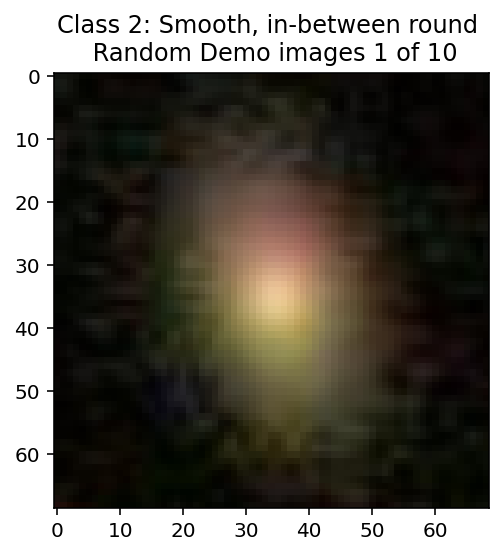

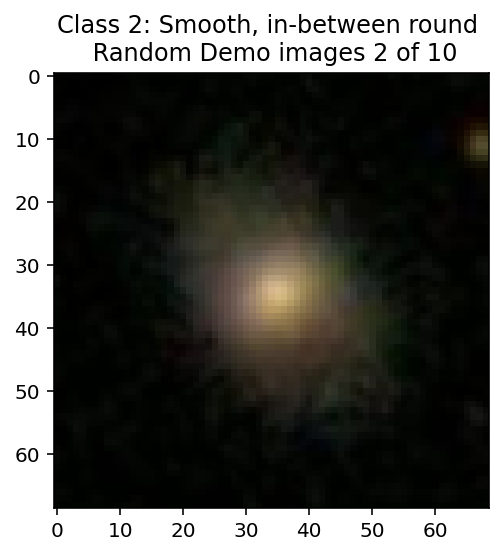

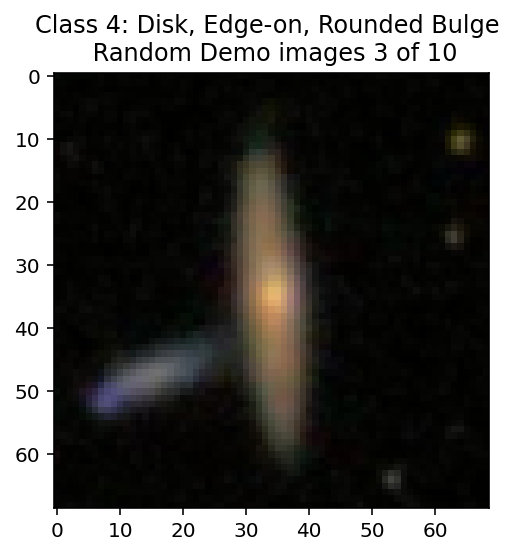

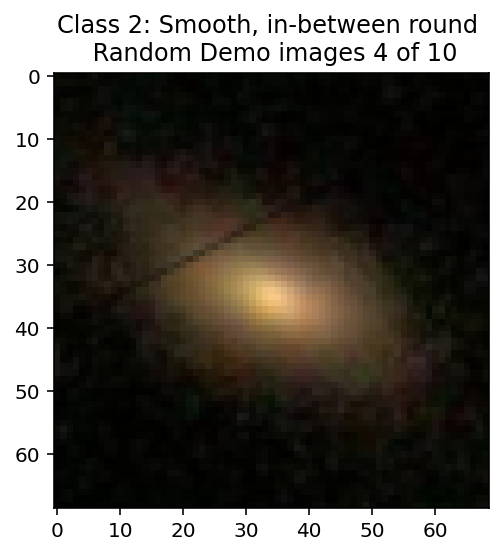

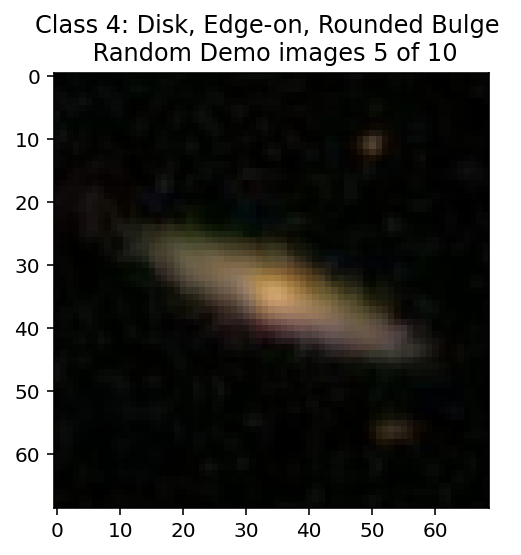

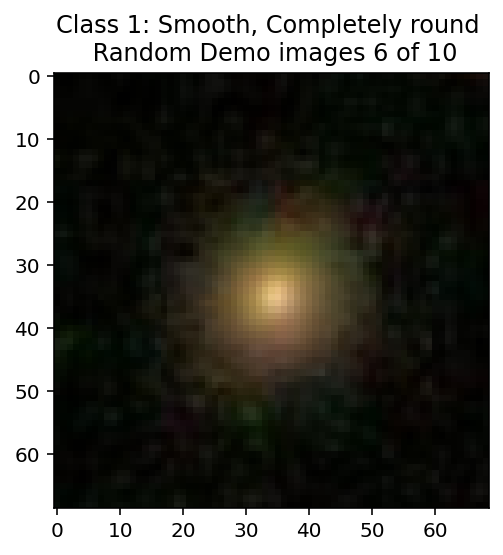

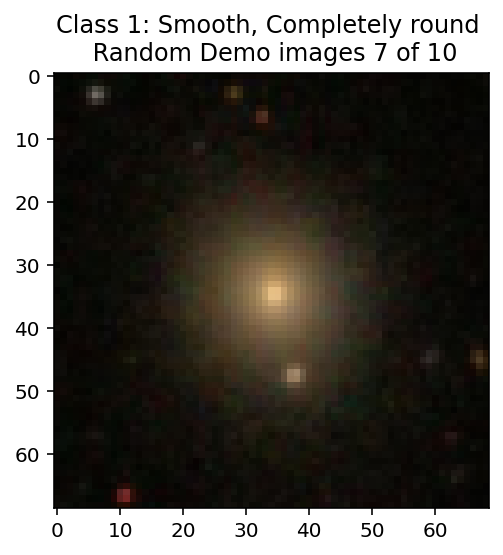

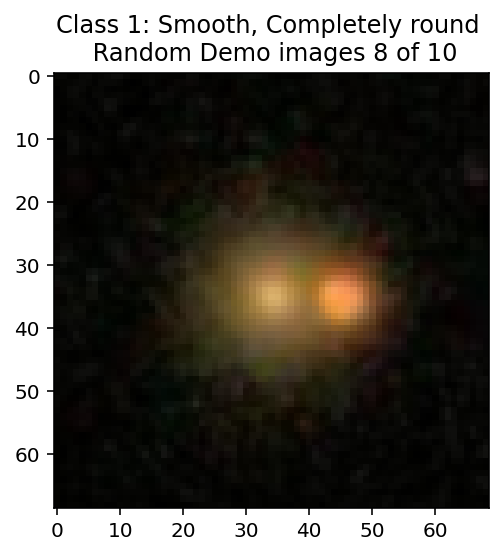

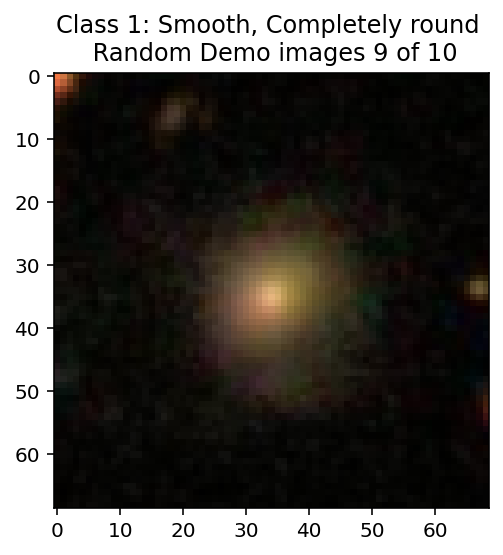

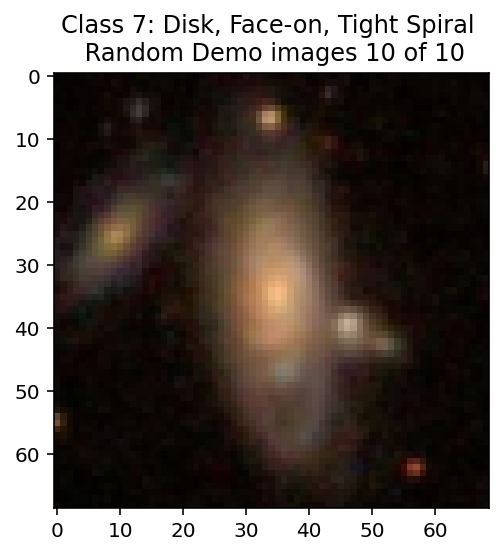

===============Data Inspection Finished===============


In [ ]:
images, labels = galaxy10.load_data()

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# Select 10 of the images to inspect
img = None
plt.ion()
print('===================Data Inspection===================')
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()
    plt.pause(2.)
plt.close('all')
print('===============Data Inspection Finished===============')

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

# Split the dataset into training set and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]



In [ ]:
test_class = np.argmax(test_labels, axis=1)

In [ ]:
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
targetname = []
for i in range(10):
        targetname.extend([galaxy10cls_lookup(i)])

In [ ]:
targetname

['Disk, Face-on, No Spiral',
 'Smooth, Completely round',
 'Smooth, in-between round',
 'Smooth, Cigar shaped',
 'Disk, Edge-on, Rounded Bulge',
 'Disk, Edge-on, Boxy Bulge',
 'Disk, Edge-on, No Bulge',
 'Disk, Face-on, Tight Spiral',
 'Disk, Face-on, Medium Spiral',
 'Disk, Face-on, Loose Spiral']

In [ ]:
img, lab = galaxy10.load_data()

/root/.astroNN/datasets/Galaxy10.h5 was found!


In [ ]:
img.shape

(21785, 69, 69, 3)

In [ ]:
from PIL import Image

In [ ]:
L = R * 299/1000 + G * 587/1000 + B * 114/1000

In [ ]:
img=img.reshape(img.shape[0],69*69,3)

In [ ]:
img.shape

(21785, 4761, 3)

In [ ]:
im

In [ ]:
img, lab = galaxy10.load_data()

img=img.reshape(img.shape[0],69*69,3)

img2=[]
for i in range(img.shape[0]):
  n=[]
  print("File "+str(i))
  for j in range(img.shape[1]):
    n.append(0.2989 *img[i][j][0] + 0.5870*img[i][j][1] + 0.1140*img[i][j][2])
  img2.append(n)
img2=np.array(img2)

File 0
File 1
File 2
File 3
File 4
File 5
File 6
File 7
File 8
File 9
File 10
File 11
File 12
File 13
File 14
File 15
File 16
File 17
File 18
File 19


In [ ]:
img2=np.array(img2)

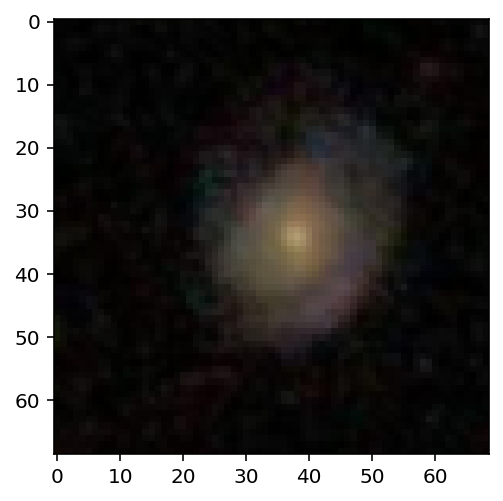

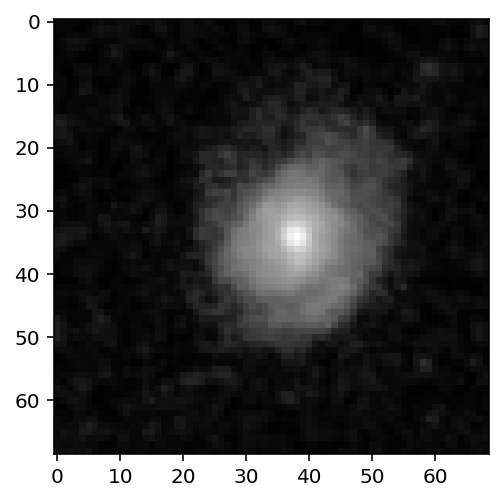

In [ ]:
id=14
plt.imshow((img.reshape(img.shape[0],69,69,3)[id][:]))
#plt.imshow((img[4][:]).convert('LA'))
plt.show()

plt.gray()
plt.imshow((img2.reshape(img2.shape[0],69,69)[id][:]))

## Preparing Model

In [ ]:
initializer = 'he_normal'
activation = 'relu'
num_filters = [8, 16]
filter_len = (3, 3)
pool_length = (4, 4)
num_hidden = [256, 128]
#max_epochs = 30
max_epochs = 5
lr=0.005
reduce_lr_epsilon = 0.00005

reduce_lr_min = 1e-8
reduce_lr_patience = 1
l2 = 1e-4

In [ ]:
# Astro CNN

def model():
    initializer = 'he_normal'
    activation = 'relu'
    num_filters = [8, 16]
    filter_len = (3, 3)
    pool_length = (4, 4)
    num_hidden = [256, 128]
    max_epochs = 30
    lr=0.005
    reduce_lr_epsilon = 0.00005

    reduce_lr_min = 1e-8
    reduce_lr_patience = 1
    l2 = 1e-4
    input_tensor = Input(shape=(69,69,3), name='input')
    cnn_layer_1 = Conv2D(kernel_initializer=initializer, padding="same", filters=num_filters[0],
                         kernel_size=filter_len, kernel_regularizer=regularizers.l2(l2))(input_tensor)
    activation_1 = Activation(activation=activation)(cnn_layer_1)
    cnn_layer_2 = Conv2D(kernel_initializer=initializer, padding="same", filters=num_filters[1],
                         kernel_size=filter_len, kernel_regularizer=regularizers.l2(l2))(activation_1)
    activation_2 = Activation(activation=activation)(cnn_layer_2)
    maxpool_1 = MaxPooling2D(pool_size=pool_length)(activation_2)
    flattener = Flatten()(maxpool_1)
    dropout_1 = Dropout(0.2)(flattener)
    layer_3 = Dense(units=num_hidden[0], kernel_regularizer=regularizers.l2(l2),
                    kernel_initializer=initializer)(dropout_1)
    activation_3 = Activation(activation=activation)(layer_3)
    dropout_2 = Dropout(0.2)(activation_3)
    layer_4 = Dense(units=num_hidden[1], kernel_regularizer=regularizers.l2(l2),
                    kernel_initializer=initializer, kernel_constraint=max_norm(2))(dropout_2)
    activation_4 = Activation(activation=activation)(layer_4)
    layer_5 = Dense(units=10)(activation_4)
    output = Activation(activation='softmax', name='output')(layer_5)

    model = Model(inputs=input_tensor, outputs=output)

    return model


In [ ]:
## My CNN
def model():
  inp = Input(shape=(69,69,3))
  conv1 = Conv2D(32, kernel_size=3, activation='relu')(inp)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  drop1=Dropout(0.5)(conv1)
  
  conv2 = Conv2D(32, kernel_size=3, activation='relu')(drop1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  drop2=Dropout(0.5)(pool2)

  conv3 = Conv2D(32, kernel_size=2, activation='relu')(drop2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  drop3=Dropout(0.5)(pool3)

  flat = Flatten()(drop3)
  dense = Dense(128, activation='relu')(flat)
  out = Dense(10, activation='softmax')(dense)
  model = Model(inputs=inp, outputs=out)
  return model  

In [ ]:
# To create a neural network instance
galaxy10net = model()
# print model summary before training
galaxy10net.summary()


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 69, 69, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 67, 67, 32)        896       
_________________________________________________________________
dropout_16 (Dropout)         (None, 67, 67, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 65, 65, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 31, 31, 32)        4128

## Training model

In [ ]:
adam = tfk.optimizers.Adam(lr=0.0005)
galaxy10net.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history=galaxy10net.fit(train_images, train_labels,validation_split=0.2,epochs=50)

NameError: ignored

## Model Results

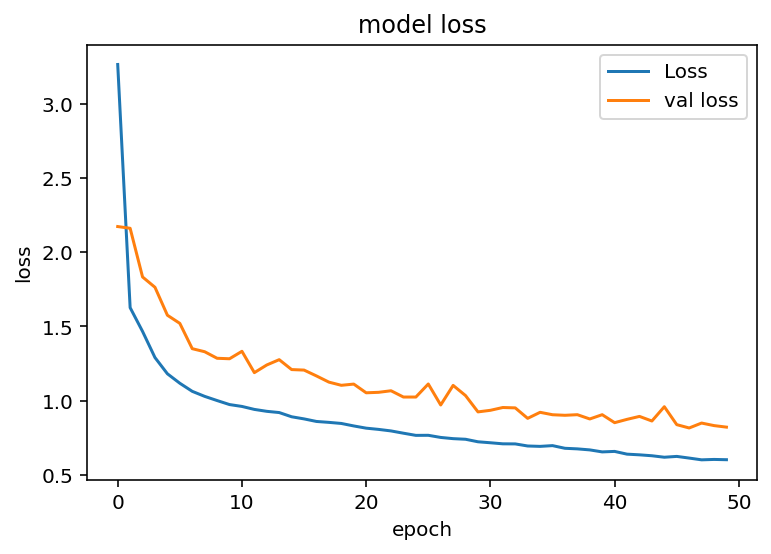

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['Loss','val loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

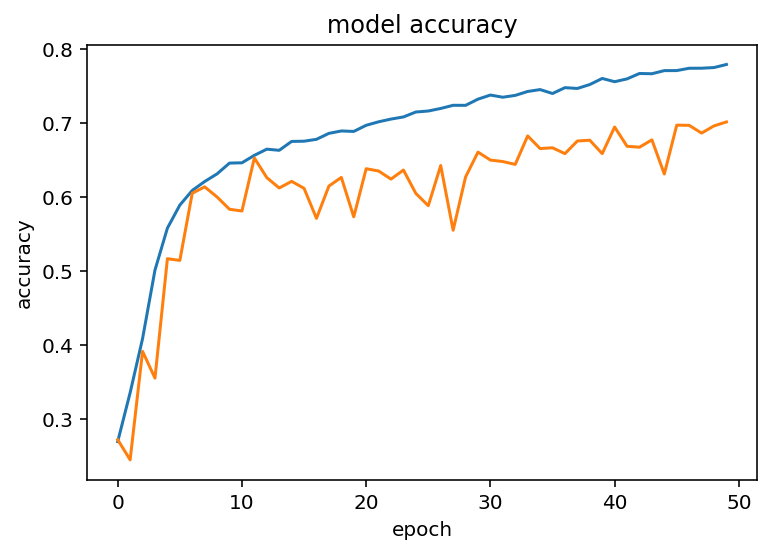

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_predict=galaxy10net.predict(test_images)

In [ ]:
prediction_class = np.argmax(y_predict, axis=1)
prediction_class

array([1, 1, 1, ..., 1, 1, 6])

In [ ]:
print("Train Accuracy",galaxy10net.evaluate(train_images, train_labels, verbose=0)[1])
print("Test Accuracy",galaxy10net.evaluate(test_images, test_labels, verbose=0)[1])

Train Accuracy 0.7628787159919739
Test Accuracy 0.7205139994621277


In [ ]:
# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

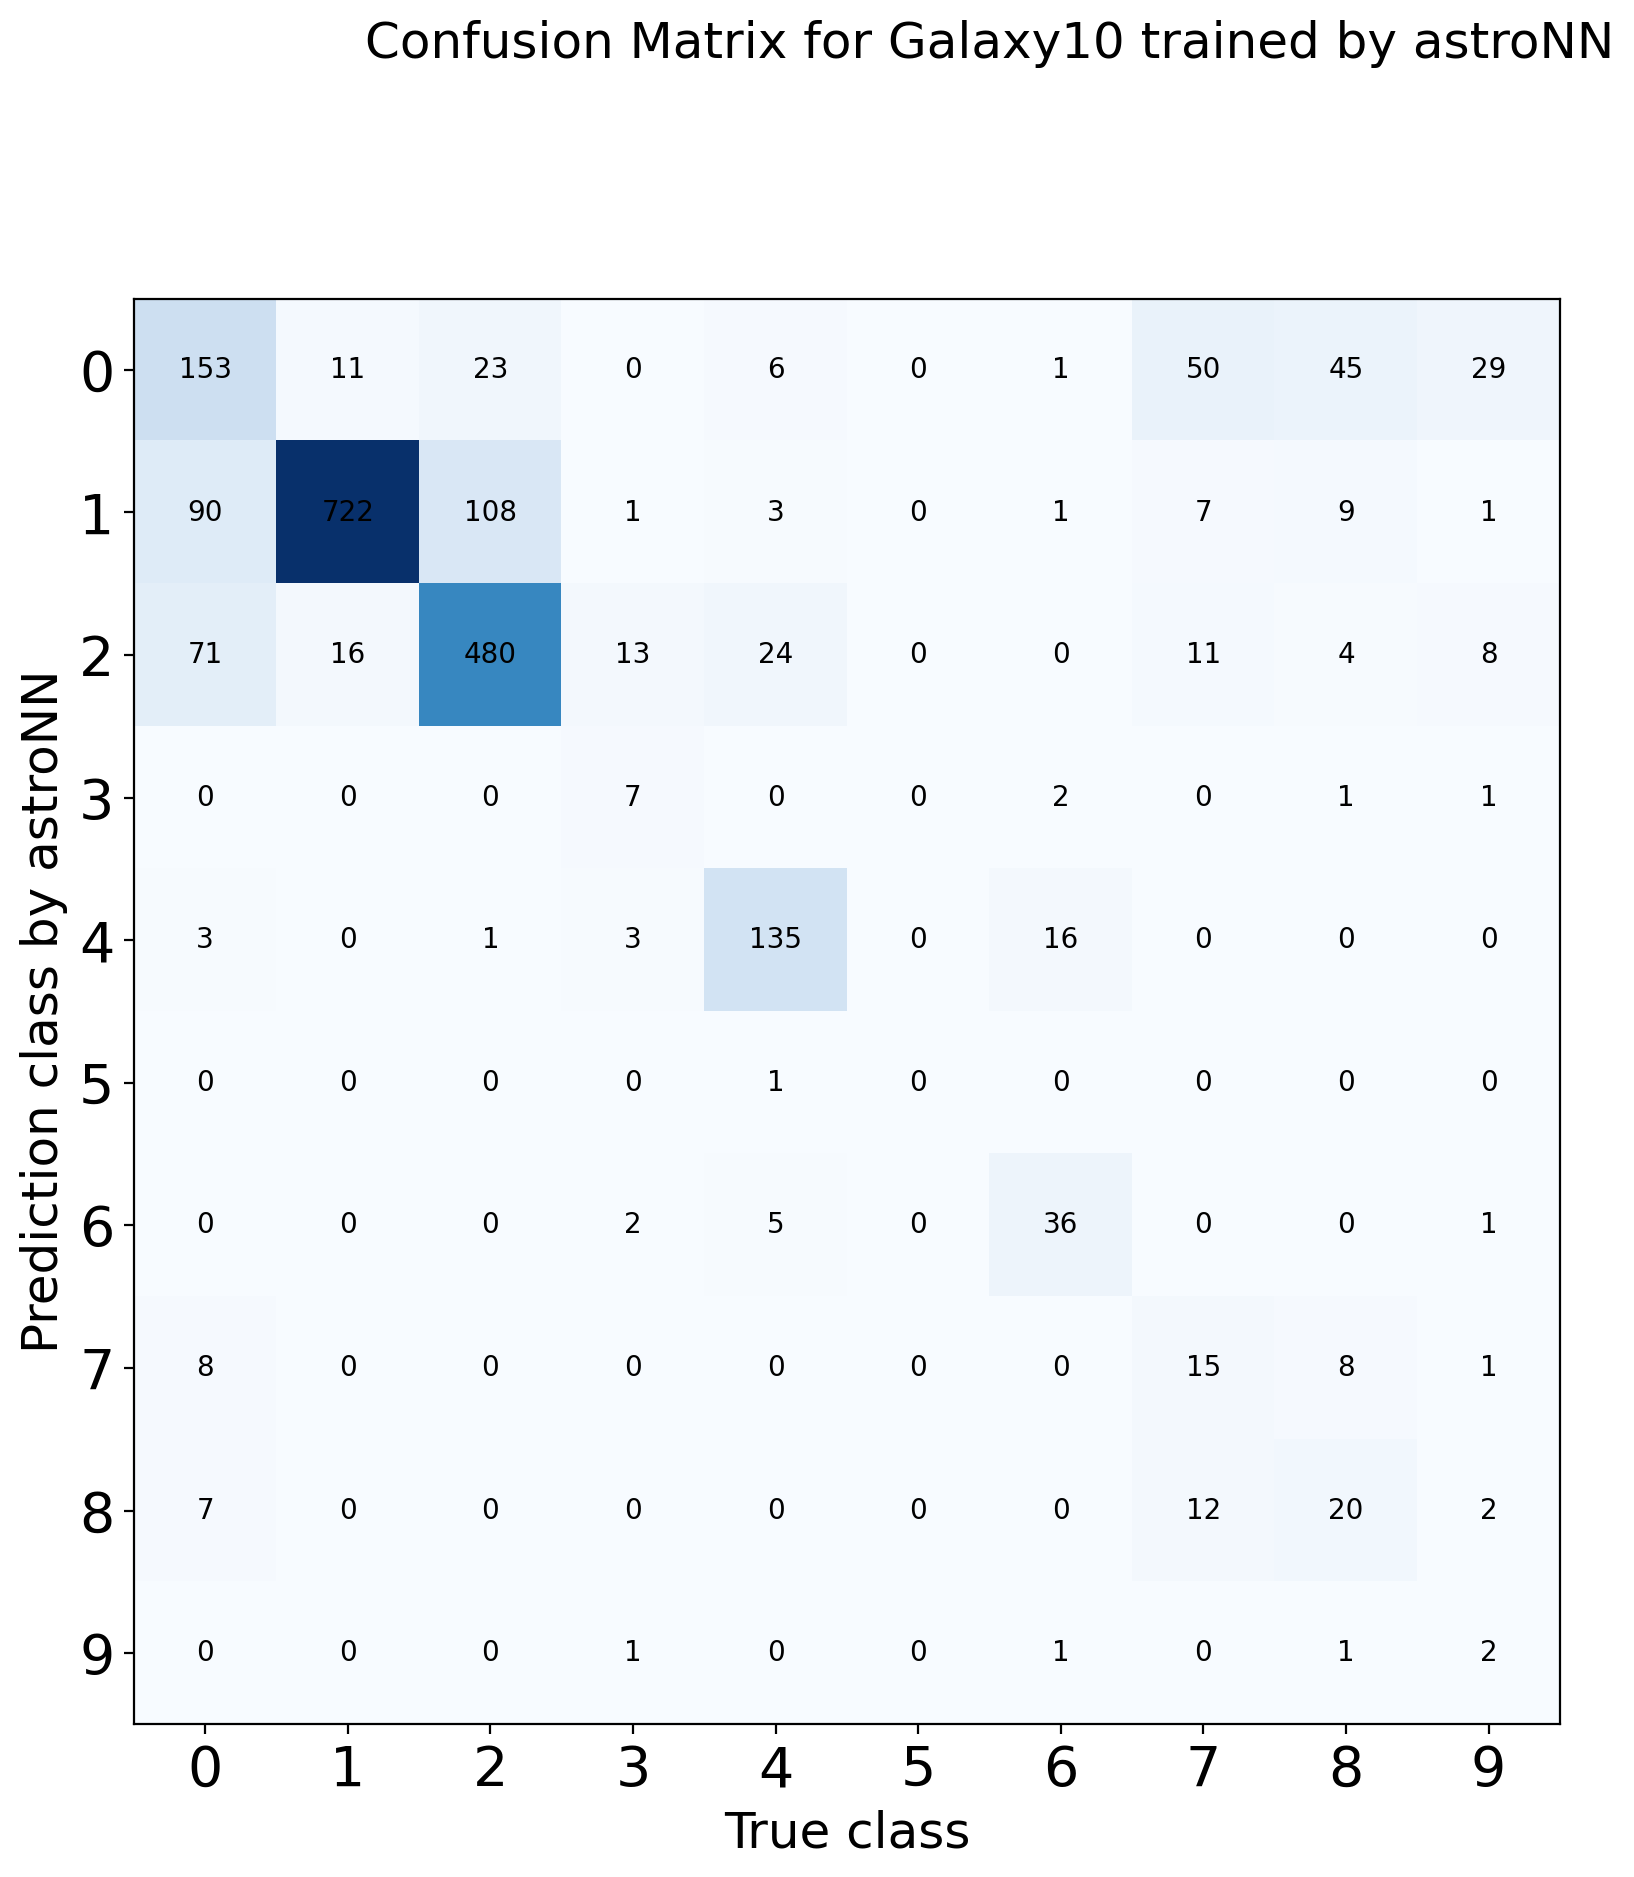

In [ ]:
# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)

# Grayscale

## Data Loading 

In [ ]:
img, lab = galaxy10.load_data()

/root/.astroNN/datasets/Galaxy10.h5 was found!


In [ ]:
img.shape

(21785, 69, 69, 3)

In [ ]:
from PIL import Image

In [ ]:
img=img.reshape(img.shape[0],69*69,3)

In [ ]:
img.shape

(21785, 4761, 3)

In [ ]:
# Converting to grayscale

img2=[]
for i in range(img.shape[0]):
  n=[]
  print("File "+str(i))
  for j in range(img.shape[1]):
    n.append(0.2989 *img[i][j][0] + 0.5870*img[i][j][1] + 0.1140*img[i][j][2])
  img2.append(n)
img2=np.array(img2)

Streaming output truncated to the last 5000 lines.
File 16786
File 16787
File 16788
File 16789
File 16790
File 16791
File 16792
File 16793
File 16794
File 16795
File 16796
File 16797
File 16798
File 16799
File 16800
File 16801
File 16802
File 16803
File 16804
File 16805
File 16806
File 16807
File 16808
File 16809
File 16810
File 16811
File 16812
File 16813
File 16814
File 16815
File 16816
File 16817
File 16818
File 16819
File 16820
File 16821
File 16822
File 16823
File 16824
File 16825
File 16826
File 16827
File 16828
File 16829
File 16830
File 16831
File 16832
File 16833
File 16834
File 16835
File 16836
File 16837
File 16838
File 16839
File 16840
File 16841
File 16842
File 16843
File 16844
File 16845
File 16846
File 16847
File 16848
File 16849
File 16850
File 16851
File 16852
File 16853
File 16854
File 16855
File 16856
File 16857
File 16858
File 16859
File 16860
File 16861
File 16862
File 16863
File 16864
File 16865
File 16866
File 16867
File 16868
File 16869
File 16870
File 16871
Fil

In [ ]:
img3=np.array(img2)

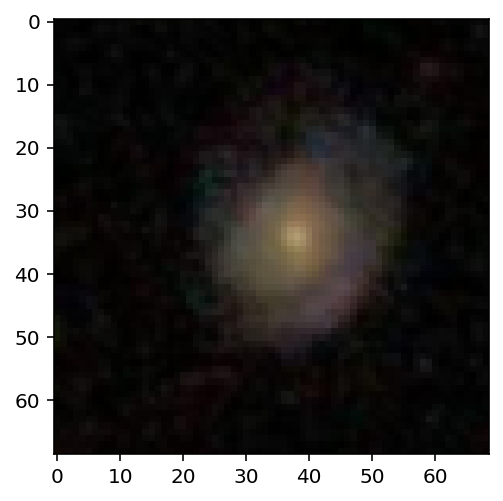

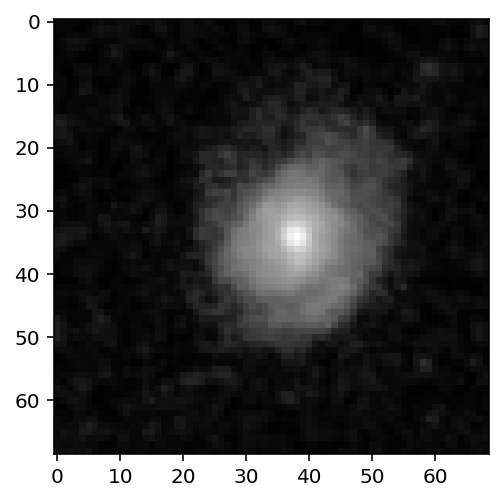

In [ ]:
id=14
plt.imshow((img.reshape(img.shape[0],69,69,3)[id][:]))
#plt.imshow((img[4][:]).convert('LA'))
plt.show()

plt.gray()
plt.imshow((img2.reshape(img2.shape[0],69,69)[id][:]))

In [ ]:
# To convert the labels to categorical 10 classes
labels = utils.to_categorical(lab, 10)


===================Data Inspection===================


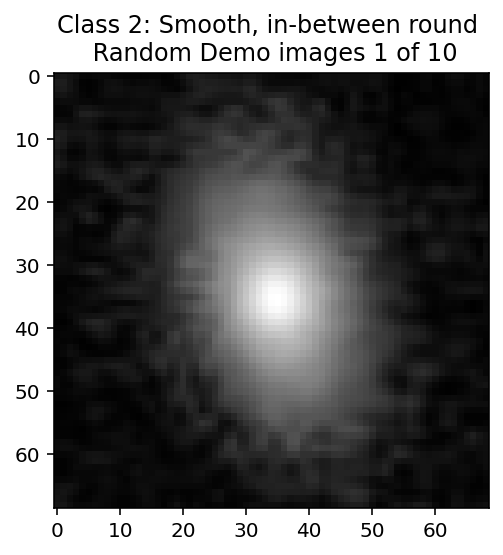

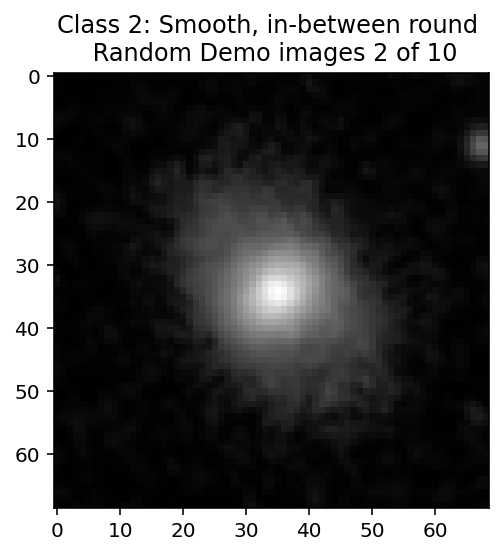

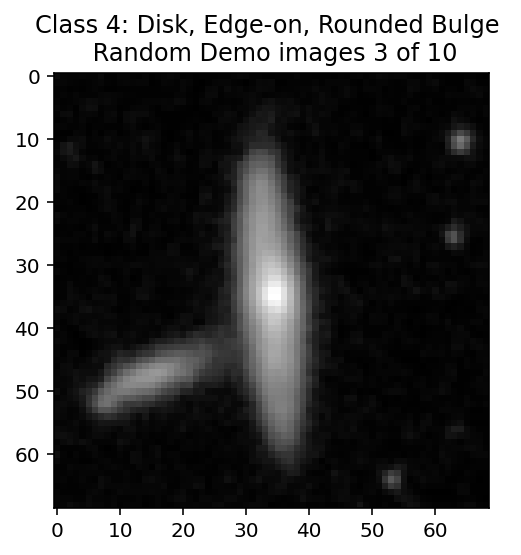

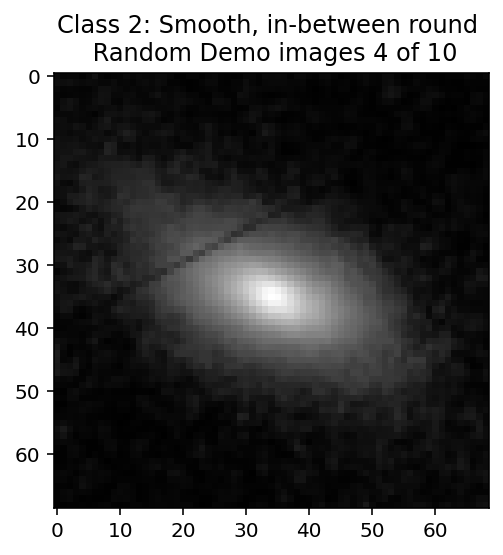

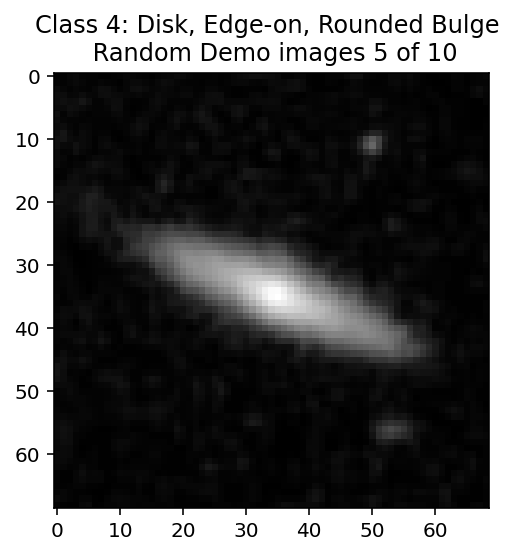

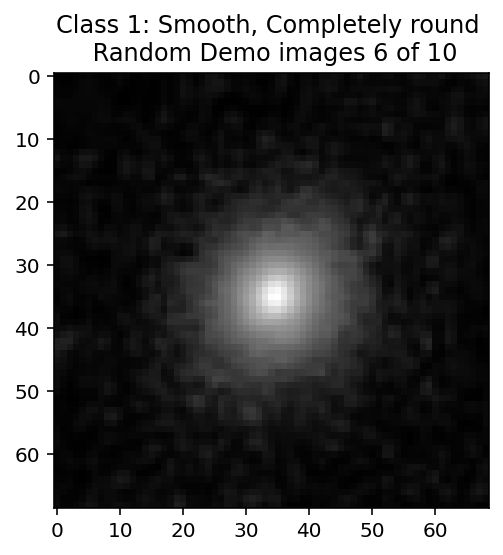

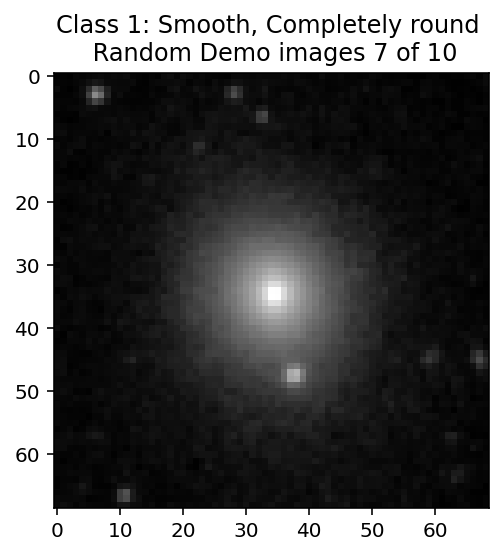

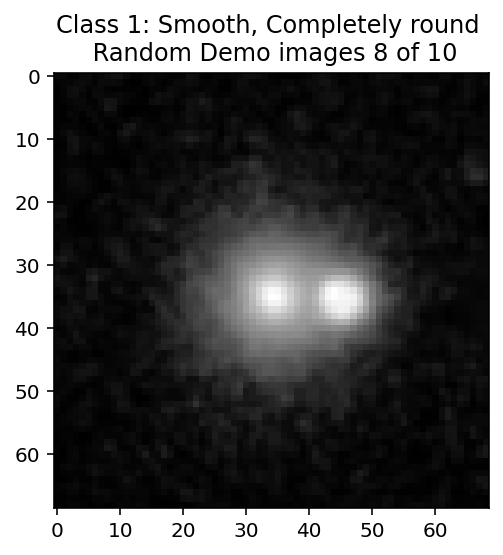

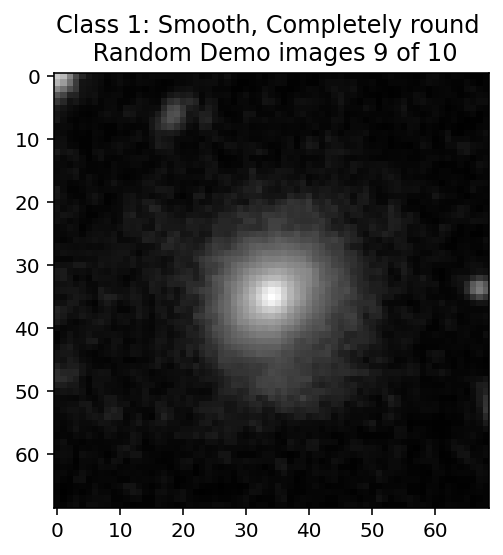

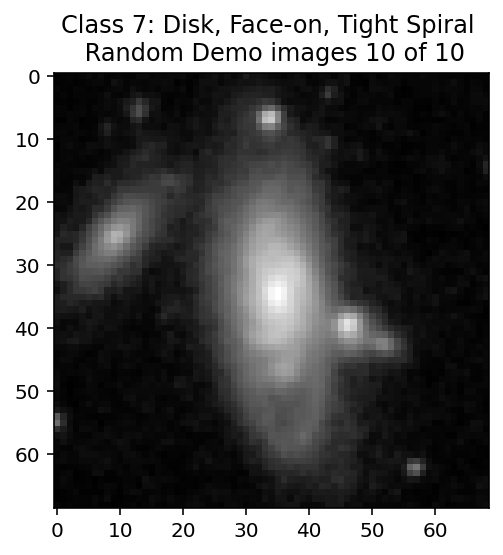

===============Data Inspection Finished===============


In [ ]:
img = None
plt.ion()
print('===================Data Inspection===================')
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(img2[i].reshape(69,69))
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()
    plt.pause(2.)
plt.close('all')
print('===============Data Inspection Finished===============')


(21785, 4761)

In [ ]:
images=img2.reshape(img2.shape[0],69,69,1)

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

# Split the dataset into training set and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]



In [ ]:
test_class = np.argmax(test_labels, axis=1)

In [ ]:
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
targetname = []
for i in range(10):
        targetname.extend([galaxy10cls_lookup(i)])

In [ ]:
targetname

['Disk, Face-on, No Spiral',
 'Smooth, Completely round',
 'Smooth, in-between round',
 'Smooth, Cigar shaped',
 'Disk, Edge-on, Rounded Bulge',
 'Disk, Edge-on, Boxy Bulge',
 'Disk, Edge-on, No Bulge',
 'Disk, Face-on, Tight Spiral',
 'Disk, Face-on, Medium Spiral',
 'Disk, Face-on, Loose Spiral']

## Preparing Model

In [ ]:
initializer = 'he_normal'
activation = 'relu'
num_filters = [8, 16]
filter_len = (3, 3)
pool_length = (4, 4)
num_hidden = [256, 128]
#max_epochs = 30
max_epochs = 5
lr=0.005
reduce_lr_epsilon = 0.00005

reduce_lr_min = 1e-8
reduce_lr_patience = 1
l2 = 1e-4

In [ ]:
# Astro CNN

def model():
    initializer = 'he_normal'
    activation = 'relu'
    num_filters = [8, 16]
    filter_len = (3, 3)
    pool_length = (4, 4)
    num_hidden = [256, 128]
    max_epochs = 30
    lr=0.005
    reduce_lr_epsilon = 0.00005

    reduce_lr_min = 1e-8
    reduce_lr_patience = 1
    l2 = 1e-4
    input_tensor = Input(shape=(69,69,3), name='input')
    cnn_layer_1 = Conv2D(kernel_initializer=initializer, padding="same", filters=num_filters[0],
                         kernel_size=filter_len, kernel_regularizer=regularizers.l2(l2))(input_tensor)
    activation_1 = Activation(activation=activation)(cnn_layer_1)
    cnn_layer_2 = Conv2D(kernel_initializer=initializer, padding="same", filters=num_filters[1],
                         kernel_size=filter_len, kernel_regularizer=regularizers.l2(l2))(activation_1)
    activation_2 = Activation(activation=activation)(cnn_layer_2)
    maxpool_1 = MaxPooling2D(pool_size=pool_length)(activation_2)
    flattener = Flatten()(maxpool_1)
    dropout_1 = Dropout(0.2)(flattener)
    layer_3 = Dense(units=num_hidden[0], kernel_regularizer=regularizers.l2(l2),
                    kernel_initializer=initializer)(dropout_1)
    activation_3 = Activation(activation=activation)(layer_3)
    dropout_2 = Dropout(0.2)(activation_3)
    layer_4 = Dense(units=num_hidden[1], kernel_regularizer=regularizers.l2(l2),
                    kernel_initializer=initializer, kernel_constraint=max_norm(2))(dropout_2)
    activation_4 = Activation(activation=activation)(layer_4)
    layer_5 = Dense(units=10)(activation_4)
    output = Activation(activation='softmax', name='output')(layer_5)

    model = Model(inputs=input_tensor, outputs=output)

    return model


In [ ]:
## My CNN
def model():
  inp = Input(shape=(69,69,1))
  conv1 = Conv2D(32, kernel_size=3, activation='relu')(inp)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
  drop1=Dropout(0.5)(conv1)
  
  conv2 = Conv2D(32, kernel_size=3, activation='relu')(drop1)
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
  drop2=Dropout(0.5)(pool2)

  conv3 = Conv2D(32, kernel_size=2, activation='relu')(drop2)
  pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
  drop3=Dropout(0.5)(pool3)

  flat = Flatten()(drop3)
  dense = Dense(128, activation='relu')(flat)
  out = Dense(10, activation='softmax')(dense)
  model = Model(inputs=inp, outputs=out)
  return model  

In [ ]:
# To create a neural network instance
galaxy10net = model()
# print model summary before training
galaxy10net.summary()


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 69, 69, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 67, 67, 32)        320       
_________________________________________________________________
dropout_25 (Dropout)         (None, 67, 67, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 65, 65, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 31, 31, 32)        4128

## Training model

In [ ]:
adam = tfk.optimizers.Adam(lr=0.0005)
galaxy10net.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history=galaxy10net.fit(train_images, train_labels,validation_split=0.2,epochs=50)

Epoch 1/50
491/491 [==============================] - 4s 8ms/step - loss: 2.7635 - categorical_accuracy: 0.3009 - val_loss: 2.2333 - val_categorical_accuracy: 0.3080
Epoch 2/50
491/491 [==============================] - 4s 7ms/step - loss: 1.6612 - categorical_accuracy: 0.3433 - val_loss: 2.1706 - val_categorical_accuracy: 0.3376
Epoch 3/50
491/491 [==============================] - 4s 8ms/step - loss: 1.4747 - categorical_accuracy: 0.4313 - val_loss: 1.6169 - val_categorical_accuracy: 0.5291
Epoch 4/50
491/491 [==============================] - 4s 7ms/step - loss: 1.2252 - categorical_accuracy: 0.5643 - val_loss: 1.3563 - val_categorical_accuracy: 0.6295
Epoch 5/50
491/491 [==============================] - 4s 8ms/step - loss: 1.1135 - categorical_accuracy: 0.6033 - val_loss: 1.2776 - val_categorical_accuracy: 0.6481
Epoch 6/50
491/491 [==============================] - 4s 8ms/step - loss: 1.0506 - categorical_accuracy: 0.6287 - val_loss: 1.2694 - val_categorical_accuracy: 0.6326
Epoc

## Model Results

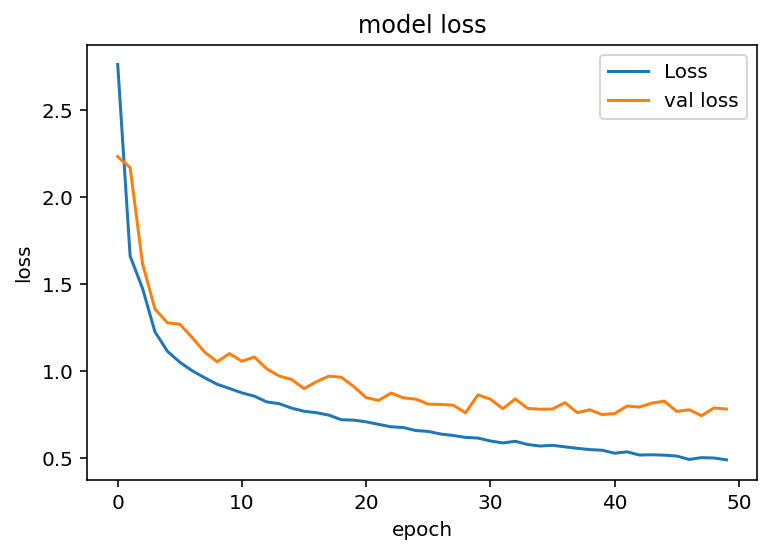

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['Loss','val loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

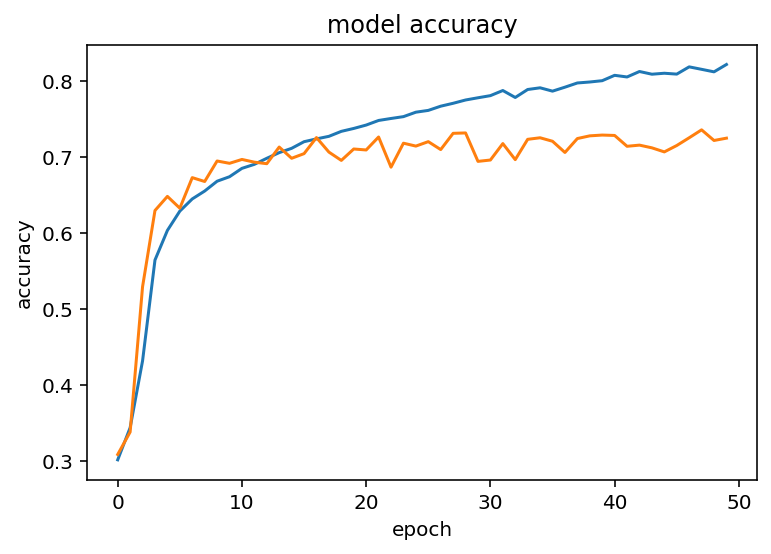

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_predict=galaxy10net.predict(test_images)

In [ ]:
prediction_class = np.argmax(y_predict, axis=1)
prediction_class

array([1, 0, 2, ..., 4, 2, 1])

In [ ]:
print("Train Accuracy",galaxy10net.evaluate(train_images, train_labels, verbose=0)[1])
print("Test Accuracy",galaxy10net.evaluate(test_images, test_labels, verbose=0)[1])

Train Accuracy 0.8260226249694824
Test Accuracy 0.7191371917724609


In [ ]:
# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

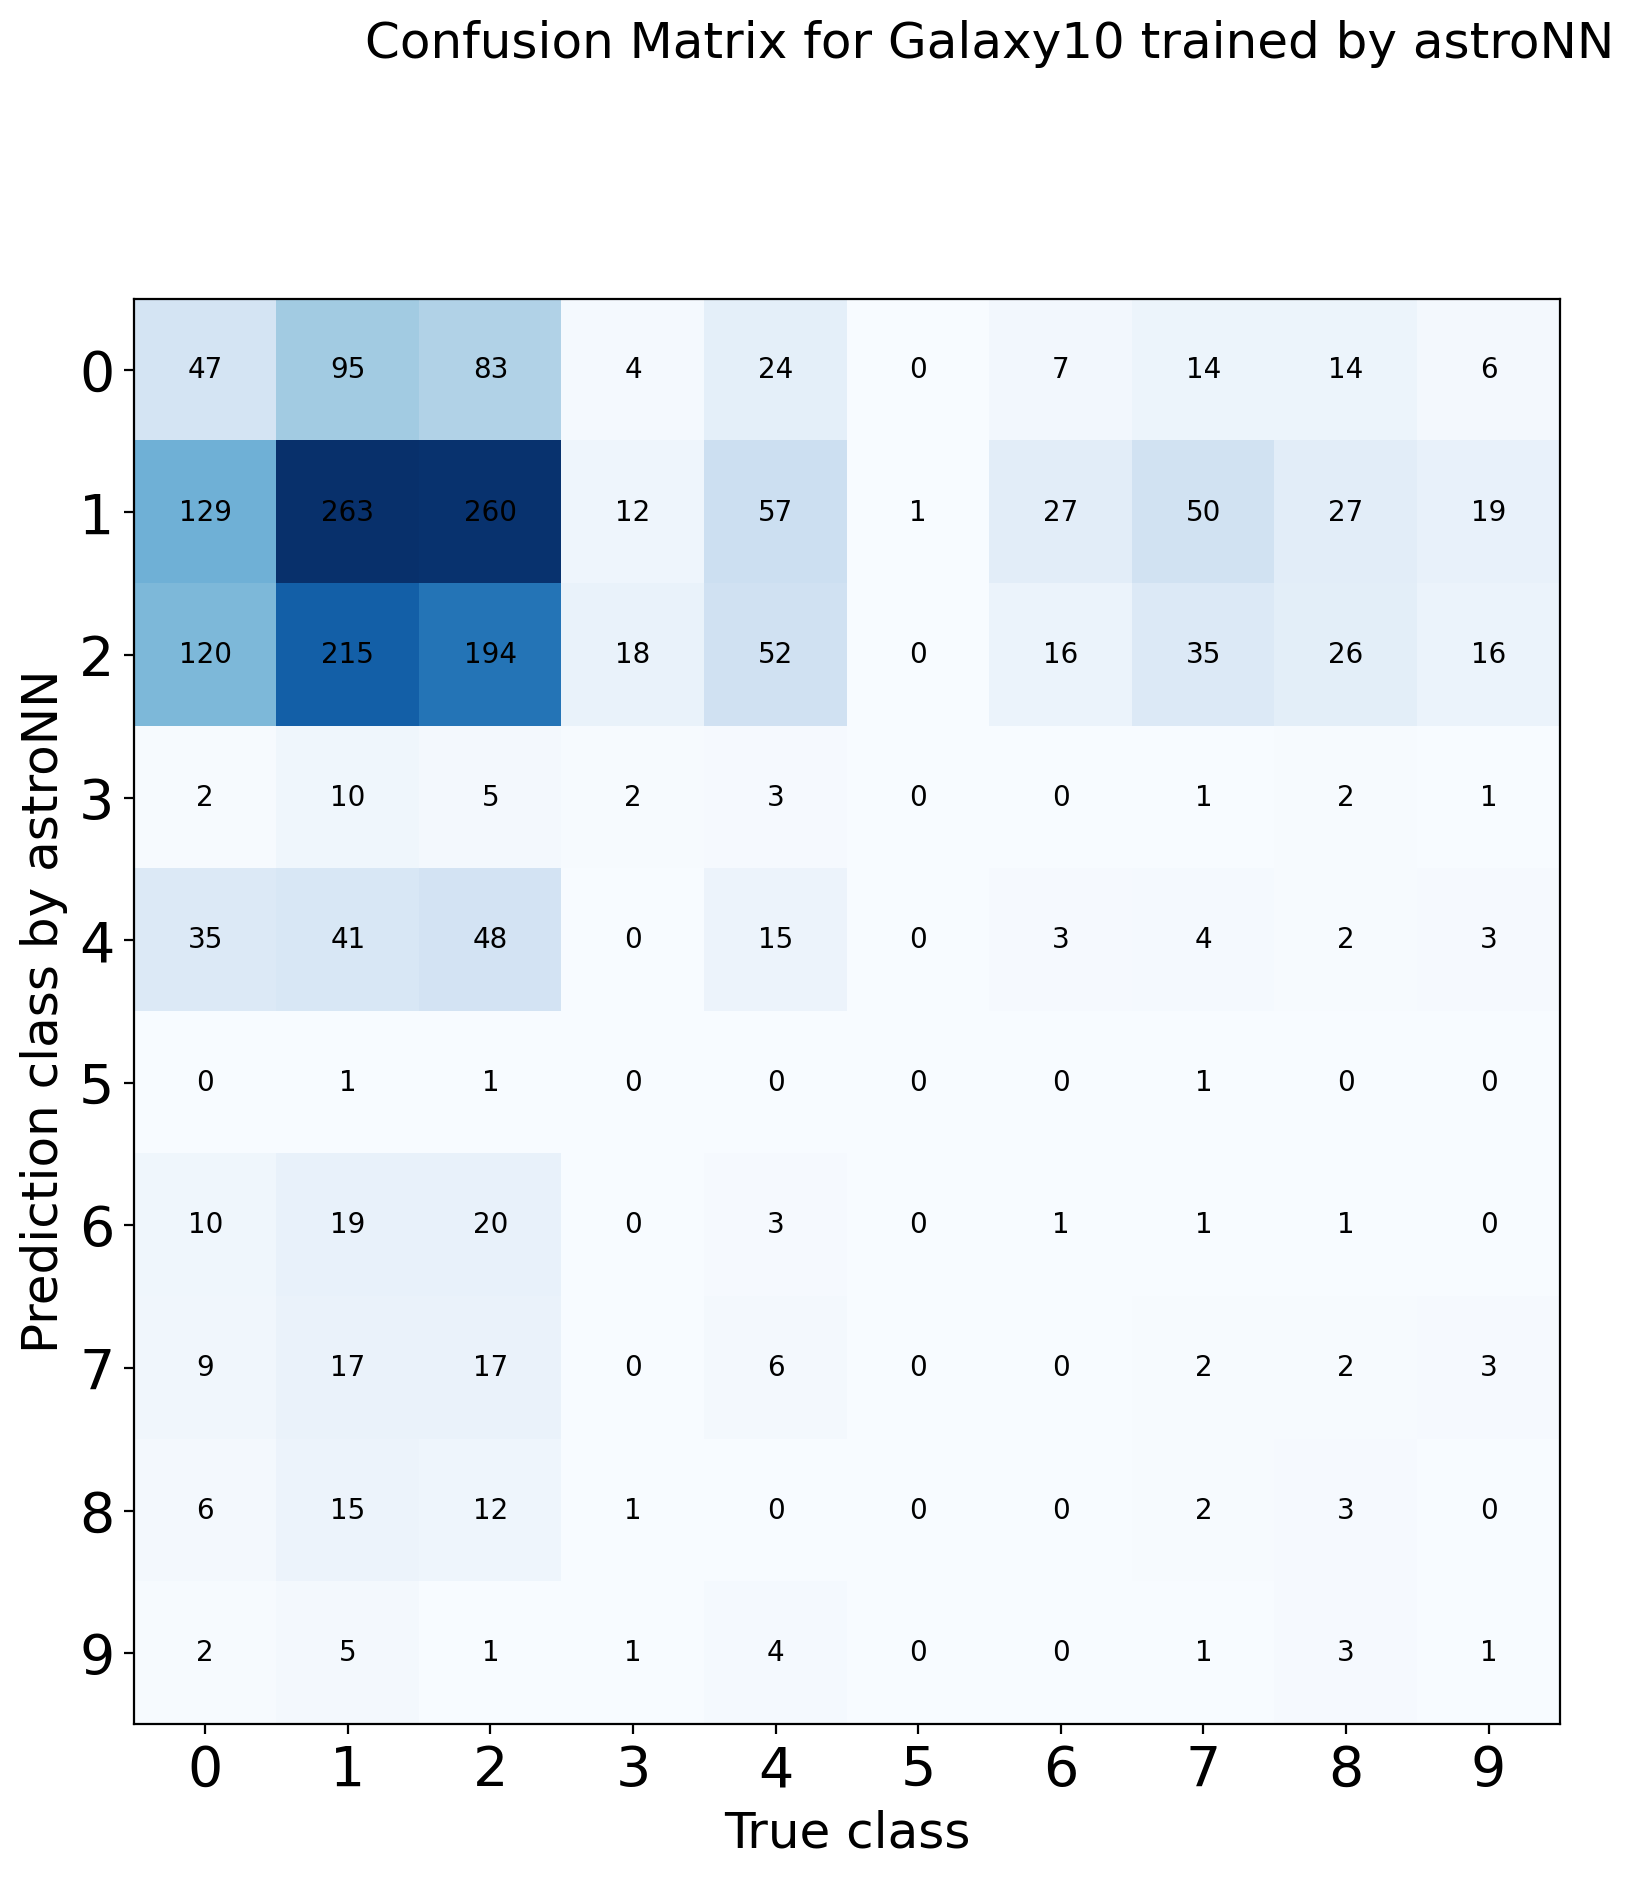

In [ ]:
# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)